# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

## Цель работы

---

Формирование представления о аддитивных цепочках, выработка умения составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, прививание навыка использования систем компьютерной алгебры для реализации алгоритмов.

## Теоретические положения

---

### Бинарный метод

Бинарный метод является одним из методов быстрого возведения числа в необходимую степень $n \in N$. В данном методе степень представляется в двоичной системе счисления. Далее идёт проход по битам слева направо: текущее число возводится в квадрат, и если бит равен единице, то дополнительно текущее число домножается на исходное число. Первый бит не учитывается, так как он всегда равен единице. Количество умножений рассчитывается по следующей формуле: $\lambda(n)+\nu(n)-1$, где $\lambda(n)=\lceil log_2 n \rceil, \nu(n)$ - количество едениц в двоичной записи числа.

### Метод множителей

Метод множителей является одним из методов быстрого возведения числа в необходимую степень $n \in N$. Составное число можно рассмотреть как произведение двух других чисел $n=k \cdot m$. Можно заметить, что степени тоже можно перемножать. Т.е. можно сначала вовести число в степень $k$, а потом полученное число возвести в степень $m$, что в совокупности даст необходимую степень $n$. Для простого числа алгоритм возводит число в степень $n-1$, а потом домножает на исходное. Таким образом можно получить результат лучше, чем бинарным методом. Метод множителей и бинарный метод дадут одинаковый результат по количеству умножений для степеней, которые меньше 14.

### Определение аддитивной цепочки

Аддитивной цепочкой для $n \in N$ называется последовательность $1=a_1, a_2, a_3, \dots, a_m=n$, где $a_i=a_j+a_k$, $k\leq j<i$ $\forall i=1..m$

$l(n)=m$ - минимальная аддитивная цепочка

Для $n \leq 1000$ справедлива следующая рекуретная формула:
$$
l(n) = min\{l(n - 1) + 1, l_n\} - \sigma_n \\
l_p= \begin{cases} \infty,\ если\ p -\ простое \\ l(q)+l(^p/_q),\ если\ q -\ минимальный\ простой\ делитель\ p \end{cases}\\
\sigma_n = {0,1}
$$
Для $\sigma_n$ нет формулы, для чисел меньших 200 $\sigma_n$ равняется единице при следующих значениях: $23, 43, 59, 77, 83, 107, 149, 163, 165, 179, 203$

### Теорема Брауэра

Теорема Брауэра.

При некотором $k < log_2 log_2 n => l(n)<(1+k^{-1}) \cdot \lceil log_2 n \rceil + 2^{k-1}-k+2$

Если положить $k=\lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$, то можно получить следующие следствия:

Следствие 1: $\lim \limits_{n \to \infty} \frac{l(n)}{\lambda(n)}=1$

Следствие 2: Наилучшая верхняя оценка для длины аддитивной цепочки: $\lambda(n)(1+\frac{1}{\lambda(\lambda(n))}+\frac{o(\lambda(\lambda(\lambda(n))))}{\lambda(\lambda(n))^2})$

### Приближенный алгоритм Яо для вычисления аддитивной цепочки

Алгоритм Яо вычисляет аддитивную цепочку для числа $n$, для которой нет гарантии, что она минимальна.

$ n,k \geq 2$, тогда $n$ можно представить следующим образом: $\displaystyle\sum_{i=0} a_i \cdot 2^{ik}$

Введём функцию $d(z)$ - сумма чисел $2^{ik}\,\forall i: a_i=z$

Аддитивная цепочка Яо начинается со степеней двойки: $Y_k(n):\{1,2,4,\dots , 2^{\lambda(n)}\}$, 
после вычисляются все $d(z)$, где $z \in \{1, 2, 3, \dots, 2^{k-1} \}$, такие что $d(z) \neq 0$. А $n=\displaystyle\sum_{z=1}^{2^{k-1}} zd(z)$

### Звездная цепочка. Гипотеза Шольца-Брауэра

Звездная цепочка - это аддитивная цепочка, в которой каждый элемент получен при помощи сложения предыдущего и какого-то ещё: $a_i=a_{i-1}+a_k$, где $0 \leq k \leq i-1$

$l^*(n)$ - минимальная звездная цепочка. Очевидно, что $l^*(n) \geq l(n)$

Гипотеза Шольца-Брауэра заключается в следующем: $l^*(2^n-1) \geq l^*(n)+n-1$

### Алгоритм дробления индексов

Алгоритм дробления индексов находит минимальную звездную цепочку для числа $n$.

Введём опредление вектора индексов. Вектором индексов аддитивной цепочки называется последовательность $\{ r_i \}_{i=1}^{m}$, где $r_i = {x: 1 \leq x \leq i}$, такая то $a_i = a_{i-1} + a_{r_i}, \, i=2..m$

Наибольшая звездная цепочка: $S_{max}=\{1, 2, 4, \dots, 2^m\} <=> r_{max} = \{1, 2, 3, \dots, m\}$
Наименьшая звездная цепочка: $S_{min}=\{1,2,3,\dots , m\} <=> r_{min}=\{1, 1, 1, \dots, 1\}$

Будем считать, что $r=\{ r_i \}_{i=1}^{m}$ больше $\tilde{r}=\{ \tilde{r}_i \}_{i=1}^{m}$ если $r_1=\tilde{r}_1; r_2=\tilde{r}_2; \dots; r_{i-1}=\tilde{r}_{i-1};r_i>\tilde{r}_i$

Нахождение минимальной аддитивной цепочки является переборной задачей. Для начала будем каждый вектор индексов разбивать на два: $r=\{ r_i \}_{i=1}^{q}$ - фиксированный вектор, $\rho=\{ \rho_j \}_{j=q+1}^{m}$ - меняющийся вектор. Заметим, что для фиксированного вектора можно вычислить максимальное и минимальное значение аддитивной цепочки:
$$
a_{max}: \{ r_i \}_{i=1}^{q} \cup \{ q+1, q+2, \dots, m \} => a_{max} = a_{q+1} \cdot 2^{m-q}\\
a_{min}: \{ r_i \}_{i=1}^{q} \cup \{ 1, 1, \dots, 1 \} => a_{min}=a_{q+1}+m-q
$$

Алгоритм перебора будет заключаться в следующем: текущий вектор индексов разбивается по середине на фиксированный и изменющийся. Берётся фиксированная часть, вычисляются $a_{max}$ и $a_{min}$. Если $n \notin [a_{min}, a_{max}]$, то осуществляется переход к следующему фиксированному вектору(в сторону уменьшения или увеличения). Если $n$ попало в данный промежуток, то осуществляется перебор по меняющемуся вектору. Если для заданной длины не нашлось аддитивной цепочки, то увеличить длину аддитивной цепочки. Длина аддитивной цепочки $m \in [\underline{l}(n), \overline{l}(n)]$, где $\underline{l}(n)=\lceil log_2 n \rceil,\, \overline{l}(n)=\lambda(n)+\nu(n)-1$

## Постановка задачи

---

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

1. Применить бинарный метод и метод множителей для $x^n$,где $n \geq 30$, для 2-3 значений $n$(значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать или алгоритм Яо для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n \geq 500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1<n \leq 10$ на алгоритме дробления вектора индексов. Сделать выводы.
6. _Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность_


## Выполнение работы

### Бинарный метод и метод множителей

Для проверки вычислений и использования в последующих частях работы были реализованы функции для бинарного метода(_binary_method_) и метода множителей(_multiplier_method_)

In [100]:
def binary_method(x, pow):
    bin_pow = bin(pow)[3:]
    count_of_mul = 0
    orig_x = x
    for bit in bin_pow:
        if bit == '0':
            x *= x
            count_of_mul += 1
        else:
            x *= x
            x *= orig_x
            count_of_mul += 2
    return x, count_of_mul

def multiplier_method(x, pow):
    multipliers = []
    for f in list(factor(pow)):
        for i in range(f[1]):
            multipliers.append(f[0])
    count_of_mul = 0
    cur_base_x = x
    for mul in multipliers:
        if mul <= 13:
            x, count_bin = binary_method(x, mul)
            count_of_mul += count_bin
            cur_base_x = x
        else:
            x, count_mm = multiplier_method(x, mul - 1)
            x *= cur_base_x
            count_of_mul += count_mm + 1
            cur_base_x = x
    return x, count_of_mul

if __name__ == "__main__":
    print("БМ и ММ")
    x = int(input("Введите X: "))
    pow = int(input("Введите степень: "))
    print(f"{x} в степени {pow} при помощи '**' = {x**pow}")
    x_in_pow, count_opers = binary_method(x, pow)
    print(f"{x} в степени {pow} бинарным методом = {x_in_pow}, количество операций = {count_opers}")
    x_in_pow, count_opers = multiplier_method(x, pow)
    print(f"{x} в степени {pow} методом множителей = {x_in_pow}, количество операций = {count_opers}")

БМ и ММ
Введите X: 1
Введите степень: 803124908
1 в степени 803124908 при помощи '**' = 1
1 в степени 803124908 бинарным методом = 1, количество операций = 48
1 в степени 803124908 методом множителей = 1, количество операций = 41


При помощи бинарного метода и метода множителей были получены следующие степени: 31, 63, 77, 121

Возведение числа $x$ в степень $n=31$:

__Бинарный метод__: 
$31_{10} = 11111_2$
$$ x, x*x=x^2, x^2*x=x^3, x^3*x^3=x^6, x^6*x=x^7, x^7*x^7=x^{14}, x^{14}*x=x^{15}, x^{15}*x^{15}=x^{30}, x^{30}*x=x^{31} $$
Количество операций: $\lambda(31) + \nu(31) - 1 = 4 + 5 - 1 = 8$

__Метод множителей__: $$ 
31 = 30 + 1 = (3 * 10) + 1\\
3_{10} = 11_2\\
10_{10} = 1010_2\\
x, x*x=x^2, x^2*x=x^3=y\\
y, y*y=y^2, y^2*y^2=y^4, y^4*y=y^5, y^5*y^5=y^{10}\\
y^{10}=(x^3)^{10}=x^{30}, x^{30}*x=x^{31}
$$

Количество операций: $БМ(3)+БМ(10)+1=\lambda(3) + \nu(3) - 1 + \lambda(10) + \nu(10) - 1 + 1= 1 + 2 - 1 + 3 + 2 - 1 + 1 = 7$

Возведение числа $x$ в степень $n=63$:

__Бинарный метод__: 
$31_{10} = 111111_2$
$$ x, x*x=x^2, x^2*x=x^3, x^3*x^3=x^6, x^6*x=x^7, x^7*x^7=x^{14}, x^{14}*x=x^{15}, x^{15}*x^{15}=x^{30}, x^{30}*x=x^{31}, x^{31}*x^{31}=x^{62}, x^{62}*x=x^{63} $$
Количество операций: $\lambda(63) + \nu(63) - 1 = 5 + 6 - 1 = 10$

__Метод множителей__: $$ 
63 = 7 * 9\\
7_{10} = 111_2\\
9_{10} = 1001_2\\
x, x*x=x^2, x^2*x=x^3, x^3*x^3=x^6, x^6*x=x^7=y\\
y, y*y=y^2, y^2*x^2=y^4, y^4*y^4=y^8, y^8*y=y^9\\
y^{9}=(x^7)^{9}=x^{63}
$$

Количество операций: $БМ(7)+БМ(9)=\lambda(7) + \nu(7) - 1 + \lambda(9) + \nu(9) - 1 = 2 + 3 - 1 + 3 + 2 - 1 = 8$

Возведение числа $x$ в степень $n=77$:

__Бинарный метод__:
$77_{10} = 1001101_2$
$$ x, x*x=x^2, x^2*x^2=x^4, x^4*x^4=x^8, x^8*x=x^9, x^9*x^9=x^{18}, x^{18}*x=x^{19}, x^{19}*x^{19}=x^{38}, x^{38}*x^{38}=x^{76}, x^{76}*x=x^{77} $$
Количество операций: $\lambda(77) + \nu(77) - 1 = 6 + 4 - 1 = 9$

__Метод множителей__:  $$ 
77 = 7 * 11\\
7_{10} = 111_2\\
11_{10} = 1011_2\\
x, x*x=x^2, x^2*x=x^3, x^3*x^3=x^6, x^6*x=x^7=y\\
y, y*y=y^2, y^2*y^2=y^4, y^4*y=y^5, y^5*y^5=y^{10}, y^{10}*y=y^{11}\\
y^{11}=(x^{7})^{11}=x^{77}
$$

Количество операций: $БМ(7)+БМ(11)=\lambda(7) + \nu(7) - 1 + \lambda(11) + \nu(11) - 1 = 2 + 3 - 1 + 3 + 3 - 1 = 9$

Возведение числа $x$ в степень $n=121$:

__Бинарный метод__: 
$121_{10} = 1111001_2$
$$ x, x*x=x^2, x^2*x=x^3, x^3*x^3=x^6, x^6*x=x^7, x^7*x^7=x^{14}, x^{14}*x=x^{15}, x^{15}*x^{15}=x^{30}, x^{30}*x^{30}=x^{60}, x^{60}*x^{60}=x^{120}, x^{120}*x=x^{121} $$
Количество операций: $\lambda(121) + \nu(121) - 1 = 6 + 5 - 1 = 10$

__Метод множителей__: $$ 
121 = 11 * 11\\
11_{10} = 1011_2\\
x, x*x=x^2, x^2*x^2=x^4, x^4*x=x^5, x^5*x^5=x^{10}, x^{10}*x=x^{11}=y\\
y, y*y=y^2, y^2*y^2=y^4, y^4*y=y^5, y^5*y^5=y^{10}, y^{10}*y=y^{11}\\
y^{11}=(x^{11})^{11}=x^{121}
$$

Количество операций: $2*БМ(11)=2*(\lambda(11) + \nu(11) - 1) = 2*(3 + 3 - 1) = 10$

Таблица с количеством операций для каждого метода для $n=31, 63, 77, 121$

| Значение n | Количество операций БМ | Количество операций ММ |
| :-: | :-: | :-: |
| 31 | 8 | 7 |
| 63 | 10 | 8 |
| 77 | 9 | 9 |
| 121 | 10 | 10 |

---
#### Вывод

Из проведенных выше вычислений, а также из теоритеских знаний следует, что в общем случае метод множителей лучше, чем бинарный метод, особенно сильно это заметно на стпенях равны $2^k-1$, где $k \in N$. В большинтсве других случаев бинарный метод и метод множителй дадут одинаковое количество умножений. Однако для степеней $2^k+1$, где $k \in N$ бинарный метод даст результат лучше, чем метод множителей. Это логично, так как для получения степени $2^k+1$ надо $k$ раз возвести число в квадрат и потом домножить на исходное. До 14 бинарный метод и метод множителей дают одинаковый результат.

### Алгоритм Яо
Реализован алгоритм Яо для вычисления приближенной аддитивной цепочки аддитивной цепочки

In [50]:
def binary_method(base_pow, pow):
    bin_pow = bin(pow)[3:]
    add_chain = [base_pow]
    cur_pow = base_pow
    for bit in bin_pow:
        cur_pow *= 2
        add_chain.append(cur_pow)
        if bit == '1':
            cur_pow += base_pow
            add_chain.append(cur_pow)
    return add_chain

def Yao(n, k):
    add_chain = [2**i for i in range(int(log(n, 2)) + 1)]
    muls = []
    orig_n = n
    divider = 2**k
    index = 0
    while n > 0:
        if n % divider != 0:
            muls.append((n % divider, index))
        index += k
        n = n // divider
    muls.reverse()
    sum_of_pows = 0
    while muls:
        z = min(muls, key=lambda x: x[0])[0]
        dz = 0
        dzs = []
        for x in muls:
            if x[0] == z:
                dz += add_chain[x[1]]
                dzs.append(dz)
        muls = list(filter(lambda x: x[0] != z, muls))
        for el in dzs:
            if el not in add_chain:
                add_chain.append(el)
        chain = binary_method(dz, z)
        for el in chain:
            if el not in add_chain:
                add_chain.append(el)
        sum_of_pows = chain[-1] + sum_of_pows
        if sum_of_pows not in add_chain:
            add_chain.append(sum_of_pows)
    print("Аддитивная цепочка: ", add_chain)
    print("Длина аддитивной цепочки: ", len(add_chain))
    

    
if __name__ == "__main__":
    n = int(input("Введите N: "))
    k = int(input("Введите K: "))
    Yao(n, k)

Введите N: 762
Введите K: 2
Аддитивная цепочка:  [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 260, 261, 522, 80, 160, 240, 762]
Длина аддитивной цепочки:  17


Алгоритм был применён к следующим числам: $76, 93, 119, 127, 139$

Таблица с минимальными аддитивными цепочками и их длинами

| $n$ | Минимальная длина | Минимальная аддитивная цепочка |
| :-: | :-: | :-: |
| 76 | 9 | [1, 2, 4, 8, 16 , 18, 19, 38, 76] |
| 93 | 10 | [1, 2, 3, 5, 10, 20, 23, 46, 92, 93] |
| 119 | 10 | [1, 2, 3, 5, 7, 14, 28, 56, 112, 119] |
| 127 | 11 | [1, 2, 3, 6, 12, 24, 48, 51, 63, 126, 127] |
| 139 | 11 | [1, 2, 4, 8, 9, 17, 34, 68, 69, 138, 139] |

Результаты алгоритма Яо при разных $k$ для $n=76$

| $k$ | Длина | Аддитивная цепочка |
| :-: | :-: | :-: |
| 2 | 9 | [1, 2, 4, 8, 16, 32, 64, 12, 76] |
| 3 | 9 | [1, 2, 4, 8, 16, 32, 64, 72, 76] |
| 4 | 11 | [1, 2, 4, 8, 16, 32, 64, 3, 6, 12, 76] |
| 5 | 11 | [1, 2, 4, 8, 16, 32, 64, 3, 6, 12, 76] |

Результаты алгоритма Яо при разных $k$ для $n=93$

| $k$ | Длина | Аддитивная цепочка |
| :-: | :-: | :-: |
| 2 | 11 | [1, 2, 4, 8, 16, 32, 64, 80, 81, 12, 93] |
| 3 | 11 | [1, 2, 4, 8, 16, 32, 64, 24, 88, 5, 93] |
| 4 | 13 | [1, 2, 4, 8, 16, 32, 64, 80, 3, 6, 12, 13, 93] |
| 5 | 14 | [1, 2, 4, 8, 16, 32, 64, 3, 6, 7, 14, 28, 29, 93] |

Результаты алгоритма Яо при разных $k$ для $n=119$

| $k$ | Длина | Аддитивная цепочка |
| :-: | :-: | :-: |
| 2 | 12 | [1, 2, 4, 8, 16, 32, 64, 68, 17, 34, 51, 119] |
| 3 | 14 | [1, 2, 4, 8, 16, 32, 64, 24, 48, 112, 3, 6, 7, 119] |
| 4 | 12 | [1, 2, 4, 8, 16, 32, 64, 17, 34, 51, 102, 119] |
| 5 | 14 | [1, 2, 4, 8, 16, 32, 64, 96, 5, 10, 11, 22, 23, 119] |

Результаты алгоритма Яо при разных $k$ для $n=127$

| $k$ | Длина | Аддитивная цепочка |
| :-: | :-: | :-: |
| 2 | 12 | [1, 2, 4, 8, 16, 32, 64, 20, 21, 42, 63, 127] |
| 3 | 13 | [1, 2, 4, 8, 16, 32, 64, 9, 18, 27, 54, 63, 127] |
| 4 | 16 | [1, 2, 4, 8, 16, 32, 64, 48, 96, 112, 3, 6, 7, 14, 15, 127] |
| 5 | 16 | [1, 2, 4, 8, 16, 32, 64, 96, 3, 6, 7, 14, 15, 30, 31, 127] |

Результаты алгоритма Яо при разных $k$ для $n=139$

| $k$ | Длина | Аддитивная цепочка |
| :-: | :-: | :-: |
| 2 | 12 | [1, 2, 4, 8, 16, 32, 64, 128, 68, 136, 3, 139] |
| 3 | 11 | [1, 2, 4, 8, 16, 32, 64, 128, 136, 3, 139] |
| 4 | 12 | [1, 2, 4, 8, 16, 32, 64, 128, 5, 10, 11, 139] |
| 5 | 12 | [1, 2, 4, 8, 16, 32, 64, 128, 5, 10, 11, 139] |

---

#### Вывод

Как видно из таблиц, для небольших чисел Алгоритм Яо даёт минимальную аддитивную цепочку при некотором $k$, правда, для некоторых чисел такое невозможно, например, для 119. Зависимости между $k$ и длиной аддитивной цепочки не наблюдается. Однако начиная с некоторго места увеличение $k$ только увеличивает длину аддитивной цепочки, что логично, так как при увеличении $k$ количество $a_i$ в $n=\displaystyle\sum_{i=0} a_i \cdot 2^{ik}$ будет уменьшатся, а сами $a_i$ будут увеличиваться, что приведёт к неэффективности данного алгоритма. Также можно предположить, что с ростом $n$ будет всё больше расходистя длина аддитивной цепочки с минимальной.

### Алгоритм дробления вектора индексов

Реализован алгоритм дробления индексов для нахождения минимальной аддитивной цепочки для числа $n$

In [4]:
import time

def get_chain_from_index_vector(r_i, ro_i):
    q = len(r_i)
    add_chain = [1]
    for index in r_i:
        add_chain.append(add_chain[-1] + add_chain[index - 1])
    for index in ro_i:
        add_chain.append(add_chain[-1] + add_chain[index - 1])
    return add_chain
    
def inc_index_vector(ind_vec, start_index=1):
    cur_max_index = start_index + len(ind_vec) - 1
    for i in range(1, len(ind_vec) + 1):
        ind_vec[-i] += 1
        if ind_vec[-i] > cur_max_index:
            if i == len(ind_vec):
                ind_vec.append(1)
                break
            ind_vec[-i] = 1
            cur_max_index -= 1
        else:
            break
    
def splitting_index_vector(n):
    counter = 0
    m = int(log(n, 2))
    up_border = m + bin(n).count('1') - 1
    if m == log(n, 2):
        m -= 1
    while m <= up_border:
        q = int(m/2)
        if q == 0:
            q = 1
        r_i = [1 for i in range(q)]
        while len(r_i) == q:
            ro_i = [1 for i in range(m - q)]
            add_chain = get_chain_from_index_vector(r_i, ro_i)
            if add_chain[-1] == n:
                return add_chain
            a_max = add_chain[q] * 2 ** (m - q)
            a_min = add_chain[q] + m - q
            if n < a_min or n > a_max:
                inc_index_vector(r_i)
                continue
            while len(ro_i) == m - q:
                add_chain = get_chain_from_index_vector(r_i, ro_i)
                if add_chain[-1] == n:
                    return add_chain
                inc_index_vector(ro_i, q + 1)
            inc_index_vector(r_i)
        m += 1
            

def print_time(time_in_seconds):
    if time_in_seconds < 1:
        if time_in_seconds * 1000 > 1:
            print(f"Время выполнения: {time_in_seconds * 1000} миллисекунд")
        elif time_in_seconds * 1_000_000 > 1:
            print(f"Время выполнения: {time_in_seconds * 1_000_000} микросекунд")
        else:
            print(f"Время выполнения: {time_in_seconds * 1_000_000_000} наносекунд")
    else:
        if time_in_seconds / 60 < 1:
            print(f"Время выполнения: {time_in_seconds} секунд")
        elif time_in_seconds / 3600 < 1:
            print(f"Время выполнения: {time_in_seconds / float(60)} минут")
        elif time_in_seconds / (3600 * 24) < 1:
            print(f"Время выполнения: {time_in_seconds / float(3600)} часов")
        else:
            print(f"Время выполнения: {time_in_seconds / float(3600 * 24)} дней")

if __name__ == "__main__":
    n = int(input("Введите N: "))
    start = time.time()
    add_chain = splitting_index_vector(n)
    end = time.time()
    print_time(end - start)
    print("Аддитивная цепочка:", add_chain)
    print("Длина аддитивной цепочки:", len(add_chain))

Введите N: 126
Время выполнения: 1.2668938636779785 секунд
Аддитивная цепочка: [1, 2, 3, 4, 7, 14, 21, 42, 63, 126]
Длина аддитивной цепочки: 10


В таблице приведены минимальные аддитивные цепочки для числа $n$, их длина и время нахождения алгоритмом дробления вектора индексов.

| $n$ | Длина | Время нахождения | Аддитивная цепочка |
| :-: | :---: | :--------------: | :----------------: |
| 511 | 13 | 13.566443804899851 минут | [1, 2, 3, 4, 7, 14, 21, 42, 63, 126, 252, 259, 511] |
| 513 | 11 | 4.482132911682129 секунд | [1, 2, 4, 8, 16, 32, 64, 128, 256, 257, 513] |
| 697 | 13 | 25.98489777247111 минут | [1, 2, 3, 5, 10, 20, 21, 41, 82, 164, 328, 369, 697] |
| 762 | 13 | 27.3882297873497 минут | [1, 2, 3, 5, 10, 13, 23, 46, 92, 184, 197, 381, 762] |

В таблице представлено сравнение длин аддитивных цепочек для $n$ различными алгоритмами

| $n$ | Алгоритм дробления индексов | Алгоритм Яо* | Бинарный метод | Метом множителей |
| :-: | :-------------------------: | :----------: | :------------: | :--------------: |
| 511 |           13                |     15       |      17        |       13         |
| 513 |           11                |     11       |      11        |       13         |
| 697 |           13                |     16       |      15        |       13         |
| 762 |           13                |     17       |      16        |       14         |

\* - для алгоритма Яо выбиралась наименьшая длина, которая была при $k=2,3$

---

#### Вывод

Как видно из первой таблицы, для нахождения наименьшей аддитивной цепочки в большинстве случаев требуется несколько десятков минут, если $n > 500$. Из второй таблицы становится ясно, что из предыдущих алгоритмов лучше всех показал себя метод множителей, а хуже всех бинарный метод. Однако стоит помнить, что в методе множителей используется факторизация, которая может замедлить вычисления. Также при больших $n$ алгоритм Яо может давать результат лучше, чем метод множителей, например, для $n=27182$ алгоритм Яо при $k=2$ вычислит аддитивную цепочку длины 20, а метод множителей - 21. Можно заключить, что алгоритм дробления вектора индексов хорош для вычислений заранее, однако если требуется находить быстро, но не минимальную аддитивнцю цепочку, то лучше выбрать другой алгоритм, например, алгоритм Яо или метод множителей.

### Проверка следствия теоремы Брауэра

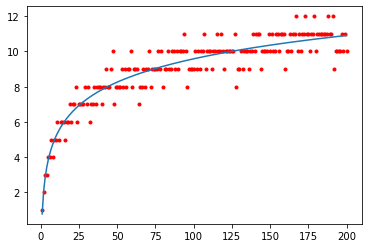

In [2]:
import pylab as plt

def get_min_len_add_chains(n):
    lens = [0]
    for i in range(2, n + 1):
        q = factor(i)[0][0]
        if n in [23, 43, 59, 77, 83, 107, 149, 163, 165, 179, 203]:
            sigma = 1
        else:
            sigma = 0
        if q == i:
            lens.append(lens[-1] + 1 - sigma)
        else:
            lens.append(min(lens[-1] + 1, lens[q - 1] + lens[i/q - 1]) - sigma)
    return [i + 1 for i in range(i)], [i + 1 for i in lens]

def plot_approximate(x, y):
    m = matrix([[sum([float((log(i))**2) for i in x]), sum([float(log(i)) for i in x])], [sum([float(log(i)) for i in x]), len(x)]])
    vec = vector([sum([float(y[i] * log(x[i])) for i in range(len(x))]), sum(y)])
    solution = m.solve_right(vec)
    plt.plot(x, [solution[0] * log(i) + solution[1] for i in x])

if __name__ == "__main__":
    ns, lens = get_min_len_add_chains(200)
    plt.scatter(ns, lens, color='r', marker='.')
    plot_approximate(ns, lens)

---

#### Вывод

Как видно из графика, множество $l(n),\, n=1..200$ аппроксимируется логарифмической кривой. Это подтверждает следствие теоремы Брауэра, которое гласит, что $l(n)$ и $\lambda(n)$ эквивалентны на бесконечности. Это означает, что с увеличением $n$ длина минимальной аддитивной цепочки будет увеличиваться незнаительно, как в случае если бы это была логарифмическая функция.

### Гипотеза Шольца-Брауэра

In [52]:
def get_chain_from_index_vector(r_i, ro_i):
    q = len(r_i)
    add_chain = [1]
    for index in r_i:
        add_chain.append(add_chain[-1] + add_chain[index - 1])
    for index in ro_i:
        add_chain.append(add_chain[-1] + add_chain[index - 1])
    return add_chain
    
def inc_index_vector(ind_vec, start_index=1):
    cur_max_index = start_index + len(ind_vec) - 1
    for i in range(1, len(ind_vec) + 1):
        ind_vec[-i] += 1
        if ind_vec[-i] > cur_max_index:
            if i == len(ind_vec):
                ind_vec.append(1)
                break
            ind_vec[-i] = 1
            cur_max_index -= 1
        else:
            break
    
def splitting_index_vector(n):
    counter = 0
    m = int(log(n, 2))
    up_border = m + bin(n).count('1') - 1
    if m == log(n, 2):
        m -= 1
    while m <= up_border:
        q = int(m/2)
        if q == 0:
            q = 1
        r_i = [1 for i in range(q)]
        while len(r_i) == q:
            ro_i = [1 for i in range(m - q)]
            add_chain = get_chain_from_index_vector(r_i, ro_i)
            if add_chain[-1] == n:
                return add_chain
            a_max = add_chain[q] * 2 ** (m - q)
            a_min = add_chain[q] + m - q
            if n < a_min or n > a_max:
                counter += 1
                inc_index_vector(r_i)
                continue
            while len(ro_i) == m - q:
                add_chain = get_chain_from_index_vector(r_i, ro_i)
                if add_chain[-1] == n:
                    return add_chain
                inc_index_vector(ro_i, q + 1)
            inc_index_vector(r_i)
        m += 1

if __name__ == "__main__":
    for n in range(2, 11):
        left = len(splitting_index_vector(2 ** n -  1))
        right = len(splitting_index_vector(n)) + n - 1
        print(f"n={n}: {left} <= {right}")

n=2: 3 <= 3
n=3: 5 <= 5
n=4: 6 <= 6
n=5: 8 <= 8
n=6: 9 <= 9
n=7: 11 <= 11
n=8: 11 <= 11
n=9: 13 <= 13
n=10: 14 <= 14


В таблице приведены значения $l^*(2^n-1)$ и $l^*(n) + n - 1$ для $n \in (1, 10]$

| Значение $n$ | $l^*(2^n-1)$ | $l^*(n) + n - 1$ |
| :-: | :-: | :-: |
| 2 | 3 | 3 |
| 3 | 5 | 5 |
| 4 | 6 | 6 |
| 5 | 8 | 8 |
| 6 | 9 | 9 |
| 7 | 11 | 11 |
| 8 | 11 | 11 |
| 9 | 13 | 13 |
| 10 | 14 | 14 |

---

#### Вывод

Как видно из полученных данных, гипотеза Шольца-Брауэра справедлива для $n \leq 10$. Нахождение минимальной аддитивной цепочки для числа $n=2^k-1$, где $k \in N$ является очень затратной операцией. Благодаря этой гипотезе можно относительно быстро вычислить минимальную длину, по которой начать делать перебор для нахождения минимальной аддитивной цепочки.

### Предложить улучшения

#### Сравнение алгоритма дробления индексов на увеличении и уменьшение

Перебор векторов индексов можно осуществлять как в порядке уменьшения, так и в порядке увеличения. Далее представлена программа, которая находит минимальную аддитивную цепочку двумя переборами и для каждого выводит время.

In [4]:
import time

def get_chain_from_index_vector(r_i, ro_i):
    q = len(r_i)
    add_chain = [1]
    for index in r_i:
        add_chain.append(add_chain[-1] + add_chain[index - 1])
    for index in ro_i:
        add_chain.append(add_chain[-1] + add_chain[index - 1])
    return add_chain
    
def inc_index_vector(ind_vec, start_index=1):
    cur_max_index = start_index + len(ind_vec) - 1
    for i in range(1, len(ind_vec) + 1):
        ind_vec[-i] += 1
        if ind_vec[-i] > cur_max_index:
            if i == len(ind_vec):
                ind_vec.append(1)
                break
            ind_vec[-i] = 1
            cur_max_index -= 1
        else:
            break

def dec_index_vector(ind_vec, start_index=1):
    i = len(ind_vec) - 1
    while i >= 0:
        if i == 0 and ind_vec[i] == 1:
            ind_vec[i] = 0
            break
        ind_vec[i] -= 1
        if ind_vec[i] == 0:
            ind_vec[i] = start_index + i
            i -= 1
        else:
            break
            
def splitting_index_vector_by_inc(n):
    counter = 0
    m = int(log(n, 2))
    up_border = m + bin(n).count('1') - 1
    if m == log(n, 2):
        m -= 1
    while m <= up_border:
        q = int(m/2)
        if q == 0:
            q = 1
        r_i = [1 for i in range(q)]
        while len(r_i) == q:
            ro_i = [1 for i in range(m - q)]
            add_chain = get_chain_from_index_vector(r_i, ro_i)
            if add_chain[-1] == n:
                return add_chain
            a_max = add_chain[q] * 2 ** (m - q)
            a_min = add_chain[q] + m - q
            if n < a_min or n > a_max:
                inc_index_vector(r_i)
                continue
            while len(ro_i) == m - q:
                add_chain = get_chain_from_index_vector(r_i, ro_i)
                if add_chain[-1] == n:
                    return add_chain
                inc_index_vector(ro_i, q + 1)
            inc_index_vector(r_i)
        m += 1

def splitting_index_vector_by_dec(n):
    counter = 0
    m = int(log(n, 2))
    up_border = m + bin(n).count('1') - 1
    if m == log(n, 2):
        m -= 1
    while m <= up_border:
        q = int(m/2)
        if q == 0:
            q = 1
        r_i = [i + 1 for i in range(q)]
        while r_i[0] != 0:
            ro_i = [q + i + 1 for i in range(m - q)]
            add_chain = get_chain_from_index_vector(r_i, ro_i)
            if add_chain[-1] == n:
                return add_chain
            a_max = add_chain[q] * 2 ** (m - q)
            a_min = add_chain[q] + m - q
            if n < a_min or n > a_max:
                dec_index_vector(r_i)
                continue
            while ro_i[0] != 0:
                add_chain = get_chain_from_index_vector(r_i, ro_i)
                if add_chain[-1] == n:
                    return add_chain
                dec_index_vector(ro_i, q + 1)
            dec_index_vector(r_i)
        m += 1

def print_time(time_in_seconds):
    if time_in_seconds < 1:
        if time_in_seconds * 1000 > 1:
            print(f"    Время выполнения: {time_in_seconds * 1000} миллисекунд")
        elif time_in_seconds * 1_000_000 > 1:
            print(f"    Время выполнения: {time_in_seconds * 1_000_000} микросекунд")
        else:
            print(f"    Время выполнения: {time_in_seconds * 1_000_000_000} наносекунд")
    else:
        if time_in_seconds / 60 < 1:
            print(f"    Время выполнения: {time_in_seconds} секунд")
        elif time_in_seconds / 3600 < 1:
            print(f"    Время выполнения: {time_in_seconds / float(60)} минут")
        elif time_in_seconds / (3600 * 24) < 1:
            print(f"    Время выполнения: {time_in_seconds / float(3600)} часов")
        else:
            print(f"    Время выполнения: {time_in_seconds / float(3600 * 24)} дней")

if __name__ == "__main__":
    n = int(input("Введите N: "))
    start = time.time()
    add_chain = splitting_index_vector_by_inc(n)
    end = time.time()
    print("От меньшего к большему:")
    print_time(end - start)
    print("    Аддитивная цепочка:", add_chain)
    print("    Длина аддитивной цепочки:", len(add_chain))
    start = time.time()
    add_chain = splitting_index_vector_by_dec(n)
    end = time.time()
    print("От большего к меньшему:")
    print_time(end - start)
    print("    Аддитивная цепочка:", add_chain)
    print("    Длина аддитивной цепочки:", len(add_chain))

Введите N: 413
От меньшего к большему:
    Время выполнения: 6.568706313769023 минут
    Аддитивная цепочка: [1, 2, 3, 6, 12, 13, 25, 50, 100, 200, 213, 413]
    Длина аддитивной цепочки: 12
От большего к меньшему:
    Время выполнения: 52.021411657333374 секунд
    Аддитивная цепочка: [1, 2, 4, 8, 16, 17, 33, 66, 132, 264, 396, 413]
    Длина аддитивной цепочки: 12


Таблица с результатами

| $n$ | Время перебора увеличением | Время перебор уменьшением |
| :-: | :-: | :-: |
| 199 | 21.469017505645752 секунд | 4.8052637577056885 секунд |
| 294 | 39.79726719856262 секунд | 1.7788362503051758 секунд |
| 348 | 2.228531074523926 минут | 42.38624620437622 секунд |
| 413 | 6.568706313769023 минут | 52.021411657333374 секунд |
| 511 | 13.566443804899851 минут | 4.492107772827149 минут |

---

Как видно из результатов, во всех случаях быстрее работает перебор в сторону уменьшения индексов, в некоторых ситуациях в несколько раз быстрее.

#### Уменьшение аддитивной цепочки в алгоритме Яо

Как легко заметить, в алгоритме Яо используется только степени $2^{ik}$, где $i \in Z_+,\, k \in N$. Поэтому среди первых элементов необязательно высчитывать степени двойки до $2^{\lambda(n)}$, а только до старшего множителя $2^{ik}$. Это остаточно тривиально, так что это не требует какого-то сравнения с изначальным алгоритмом.

#### Сравнение бинарного метода и улучшенного алгоритма Яо

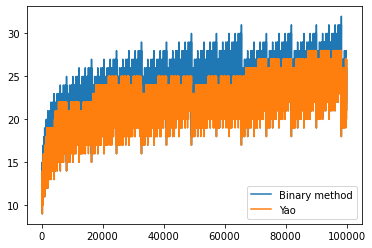

In [51]:
import pylab as plt

def binary_method(pow, base_pow=1):
    bin_pow = bin(pow)[3:]
    add_chain = [base_pow]
    cur_pow = base_pow
    for bit in bin_pow:
        cur_pow *= 2
        add_chain.append(cur_pow)
        if bit == '1':
            cur_pow += base_pow
            add_chain.append(cur_pow)
    return add_chain

def Yao(n, k):
    muls = []
    orig_n = n
    divider = 2**k
    index = 0
    while n > 0:
        if n % divider != 0:
            muls.append((n % divider, index))
        index += k
        n = n // divider
    muls.reverse()
    add_chain = [2**i for i in range(index - k + 1)]
    sum_of_pows = 0
    while muls:
        z = min(muls, key=lambda x: x[0])[0]
        dz = 0
        dzs = []
        for x in muls:
            if x[0] == z:
                dz += add_chain[x[1]]
                dzs.append(dz)
        muls = list(filter(lambda x: x[0] != z, muls))
        for el in dzs:
            if el not in add_chain:
                add_chain.append(el)
        chain = binary_method(z, base_pow=dz)
        for el in chain:
            if el not in add_chain:
                add_chain.append(el)
        sum_of_pows = chain[-1] + sum_of_pows
        if sum_of_pows not in add_chain:
            add_chain.append(sum_of_pows)
    return len(add_chain)
    
    
if __name__ == "__main__":
    ns = [i for i in range(200, 100000)]
    binary = []
    yao = []
    for n in ns:
        binary.append(len(binary_method(n)))
        yao.append(min([Yao(n, k) for k in range(2,13)]))
    plt.plot(ns, binary, ns, yao)
    plt.legend(["Binary method", "Yao"])

Как видно из графика, алгоритм Яо вычисляет аддитивную цепочку длиной меньше, чем это делает бинарный метод. В основном разница составляет несколько элементов в аддитивной цепочке, количсетво которых не превышает 5-6.

#### Рекурсивный Яо

Как было выяснено, алгоритм Яо показывает результат лучше, чем бинарный метод. Тогда в алгоритме Яо можно при вычислении подцепочки $zd(z)$ при значение $z$ больше какого-то использовать алгоритм Яо для нахождения аддитивной. В данном примере была выбрана граница в 200.

In [68]:
import pylab as plt

def binary_method(pow, base_pow=1):
    bin_pow = bin(pow)[3:]
    add_chain = [base_pow]
    cur_pow = base_pow
    for bit in bin_pow:
        cur_pow *= 2
        add_chain.append(cur_pow)
        if bit == '1':
            cur_pow += base_pow
            add_chain.append(cur_pow)
    return add_chain

def Yao(n, k, rec=False, base=1):
    border = 200
    muls = []
    orig_n = n
    divider = 2**k
    index = 0
    while n > 0:
        if n % divider != 0:
            muls.append((n % divider, index))
        index += k
        n = n // divider
    muls.reverse()
    add_chain = [2**i for i in range(index - k + 1)]
    sum_of_pows = 0
    while muls:
        z = min(muls, key=lambda x: x[0])[0]
        dz = 0
        dzs = []
        for x in muls:
            if x[0] == z:
                dz += add_chain[x[1]]
                dzs.append(dz)
        muls = list(filter(lambda x: x[0] != z, muls))
        for el in dzs:
            if el not in add_chain:
                add_chain.append(el)
        if rec and z > border:
            chain = min([Yao(z, k, base=dz) for k in range(2, int(log(z, 2)) + 1)], key=lambda x: len(x))
        else:
            chain = binary_method(z, base_pow=dz)
        for el in chain:
            if el not in add_chain:
                add_chain.append(el)
        sum_of_pows = chain[-1] + sum_of_pows
        if sum_of_pows not in add_chain:
            add_chain.append(sum_of_pows)
    return [element * base for element in add_chain]
    
    
if __name__ == "__main__":
    n = int(input("Введите N: "))
    k = int(input("Введите K: "))
    #for k in range(2, int(log(n, 2)) + 2):
    #    print(k)
    #    add_chain = Yao(n, k, True)
    #    print("    Рекурсивный алгоритм Яо:", len(add_chain))
    #    add_chain = Yao(n, k)
    #    print("    Улучшенный алгоритм Яо:", len(add_chain))
    
    add_chain = Yao(n, k, True)
    print("Рекурсивный алгоритм Яо:")
    print("    Аддитивная цепочка: ", add_chain)
    print("    Длина аддитивной цепочки: ", len(add_chain))
    add_chain = Yao(n, k)
    print("Улучшенный алгоритм Яо:")
    print("    Аддитивная цепочка: ", add_chain)
    print("    Длина аддитивной цепочки: ", len(add_chain))

Введите N: 33123772052
Введите K: 23
Рекурсивный алгоритм Яо:
    Аддитивная цепочка:  [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864, 134217728, 268435456, 536870912, 1073741824, 2147483648, 4294967296, 8589934592, 805306368, 10737418240, 10770972672, 21541945344, 32312918016, 33118224384, 2101248, 2101312, 2101320, 4202640, 4235408, 1536, 4236944, 4236948, 1310720, 5547668, 33123772052]
    Длина аддитивной цепочки:  51
Улучшенный алгоритм Яо:
    Аддитивная цепочка:  [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 25165824, 50331648, 58720256, 117440512, 125829120, 251658240, 503316480, 511705088, 1023410176, 1031798784, 2063597568, 4127195136, 4135583744, 8271167488, 8279556096, 16559112192, 33118224384, 5, 10, 20, 21, 42, 84, 168, 169, 338, 676, 677, 

Так как в разложение должны быть числа большие 200, то были использованы следующие числа:
* При $k=8$ и $n = 15977537 = 65 \cdot 2^0 + 204 \cdot 2^8 + 243 \cdot 2^{16}$
* При $k=10$ и $n = 803124908 = 684 \cdot 2^0 + 941 \cdot 2^{10} + 765 \cdot 2^{20}$
* При $k=12$ и $n = 33123772052 = 1684 \cdot 2^0 + 1354 \cdot 2^{12} + 1974 \cdot 2^{24}$

Для сравнения также были найдены аддитивные цепочки бинарным метод, методом множителей и улучшенным алгоритмом Яо при другом $k$, при котором аддитивная цепочка имеет наименьшую длину

| $n$ | $k$ фиксированное | Рекурсивный алгоритм Яо | Улучшенный алгоритм Яо | Бинарный метод | Метод множителей | Улучшенный алгоритм Яо(минимальная длина) | $k$ для минимальной длины |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 15977537 | 8 | 33 | 41 | 35 | 34 | 31 | 2 |
| 15977537 | 12 | 32 | 45 | 35 | 34 | 31 | 2 |
| 803124908 | 10 | 50 | 64 | 49 | 42 | 45 | 2 |
| 803124908 | 11 | 49 | 66 | 49 | 42 | 45 | 2 |
| 803124908 | 13 | 48 | 70 | 49 | 42 | 45 | 2 |
| 803124908 | 15 | 47 | 61 | 49 | 42 | 45 | 2 |
| 803124908 | 28 | 46 | 75 | 49 | 42 | 45 | 2 |
| 33123772052 | 12 | 54 | 69 | 52 | 49 | 51 | 23 |
| 33123772052 | 14 | 53 | 73 | 52 | 49 | 51 | 23 |
| 33123772052 | 19 | 52 | 67 | 52 | 49 | 51 | 23 |
| 33123772052 | 23 | 51 | 72 | 52 | 49 | 51 | 23 |

---

Из результатов видно, что рекурсивный алгоритм даёт аддитивную цепочку меньшей длины, чем улучшенный алгоритм при том же $k$. Также бинарный метод и метод множителей дают результат лучше при некоторых значения $n$. Также была замечена интересная особенность: наименьшая аддитивная цепочка в большинстве случаев получалается при $k=2$, при котором рекурсивный вызов не нужен, однако для числа $33123772052$ наименьшая аддитивная цепочка получается при $k=23$

## Вывод по практической работе

---

Были изучены, реализованы и исследованы алгоритмы формирования аддитивных цепочек. В практической работе были рассмотрены следующие алгоритмы:
* Бинарный метод
* Метод множителей
* Алгоритм Яо
* Алгоритм дробления вектора индексов

Было выяснено, что в общем случае бинарный метод хуже, чем меотд множитлей, за исключением чисел $2^k+1,\,k \in N$. Алгоритм Яо не всегда вычисляют минимальную аддитивную цепочку, однако делает достаточно быстро. Алгоритм дробления вектора индексов является переборным алгоритмом для поиска наименьшей аддитивной цепочки для числа $n$. Так как это переборная задача, то время выполнения растёт быстрее, чем экспоненциальное. Поэтому если необходимо быстро, но не обязательно минимально вычислять аддитивную цепочку, то стоит выбрать приближённый алгоритм.

Также была проверено следсвие теоремы Брауэра на $n=1..200$, которое оказалось справедливым. Данное следствие убеждает нас в том, что множество $l(n)$ аппроксимируется логарифмической кривой, что означает небольшое рост $l(n)$ при увеличении $n$. Также была проверена гипотеза Шольца-Брауэра на $n \in (1, 10]$. Благодаря этой гипотезе можно достаточно быстро узнать минимальную длину аддитивной цепочки для $n=2^k-1,\,k \in N$, и уже на этой длине осуществлять переборный алгоритм.